<h1><center>Twitter Mining</center></h1>

## Theoretischer Hintergrund

Social Media Mining ist der Prozess Rohdaten aus Social Media Plattformen zu extrahieren, sie bezüglich Muster zu analysieren und die Erkenntnisse daraus zu präsentieren. Im Social Media Mining werden Konzepte und Methoden aus der Informatik, dem Data Mining, Machine Learning und der Statistik angewendet. Social Media Mining bringt aber auch neue Konzepte und Algorithmen mit sich mit denen es möglich ist massive Rohdaten aus den Social Media Anwendungen zu untersuchen. Dadurch kann herausgefunden werden, wie Individuen (social atoms) interagieren und wie sich Communities (social molecules) bilden. Social Media Mining basiert daher auf Konzepten und Methodologien aus Soziale Netzwerkanalyse (social network analysis), Network Science, Soziologie, Ethnography, Optimierung und Mathematik. Die wichtigsten unter ihnen sind die Netzwerk- und Graphentheorie. In diesen Theorien kann jedes Individuum durch einen Knoten (node) repräsentiert werden und die Beziehungen der Individuen untereinander durch eine Kante (edge). Im Social Media Mining wird das Interessengraph (interest graph) genannt. Mit Hilfe von Interessengraphen können Korrelationen zwischen Objekten gemessen werden, um beispielsweise Empfehlungen zu machen. Empfehlungen darüber wem man auf Twitter folgen sollte, was man online kaufen sollte oder wen man kennenlernen sollte.

## Praktischer Hintergrund

### Twitter Terminologie

<b>Tweets</b> sind Status-Aktualisierungen, die maximal 140 Zeichen umfassen. Jedoch werden zusätzlich zum Textinhalt weitere wichtige Informationen mitgesendet.<br> 
<b>Entities</b> sind Teil eines jeden Tweets und stellen wichtige Metadaten zur Verfügung. Entities beinhalten Informationen über URL's, Medien, Hashtags und Nutzererwähnungen.<br> 
<b>Places</b> ist ein weiteres Objekt, das Metadaten liefert. Places sind Orte mit dem Ortsnamen und den dazugehörigen Koordinaten. Places kann der Ort sein an dem das Tweet gesendet wurde oder nur der Ort, der im Tweet genannt wird.<br> 

### Twitter API

Twitter hat eine sehr elegante und einfach zu nutzende API. Jedoch werden wir ein Python-Package namens <b>twitter</b> benutzen, das für uns die Arbeit als Analysten stark vereinfacht. Zur Installation des Paketes können wir einfach <b>pip install twitter</b> im Terminal eingeben. Bevor wir jedoch Anfragen an die Twitter API stellen können müssen wir eine Twitter Applikation erstellen.

### Twitter App erstellen

Auf der Seite https://dev.twitter.com/apps können wir eine Twitter Applikation erstellen. Dazu benötigen wir selbstverständlich ein Twitter Account. Die Applikation ist der einzige Weg für Entwickler Zugang zur Twitter API zu erhalten. Ebenso hat Twitter dadurch die Möglichkeit andere Plattformentwickler zu überwachen und gegebenefalls mit ihnen zu interagieren.

Mit der Erstellung der App also authorisieren wir ihn den Zugang zu unseren Accountdaten. Zugangsstufen können nach der Erstellung angepasst werden. Als Standardwert eingestellt ist <b>read and write</b>, jedoch reicht für uns die Stufe <b>read-only</b>. Deshalb kann sie nach eigenen Wünschen eingstellt werden. Diese Vorgehensweise der Authorisierung ist durch das Protokoll <b>OAuth</b> (Open Authorization) standardisiert und wird von den meisten Social Media Plattformen benutzt. Dadurch können die Benutzer den Anwendungen von Drittanbietern Zugang zu ihren Accountdaten erlauben ohne ihre Zugangsdaten preiszugeben.

<img src="create_twitter_app.png" height="640" width="640">

Nach der Erstellung der App sind die einzigen Informationen, die wir benötigen ,um unsere App zu authorisieren Anfragen an die Twitter API zu stellen <b>consumer key</b>, <b>consumer secret</b>, <b>access token</b> und <b>access token secret.</b> An diese sensiblen Informationen gelangen wir über das Register <b>Keys and Access Tokens</b>.   

<img src="ds_app_details.png" width="640" height="640">

### Analysieren der Trends

Nach dem wir unsere keys und secrets erzeugt haben können wir nun eine authorisierte Verbindung zur Twitter API aufbauen.

In [1]:
 import twitter

In [ ]:
# Inline Hilfe für das Twitter-Package
twitter?
# Inline Hilfe für die Twitter-Klasse
twitter.Twitter?

In [2]:
# Nach dem du die Twitter-App erzeugt hast, setze die keys und secrets in die entsprechenden Variablen ein
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print (twitter_api)

Nun können wir die 50 wichtigsten Themen in verschiedenen Ländern oder weltweit herausfinden. Wir benötigen jedoch eine WOEID den wir als Parameter an unsere Methode übergeben. Das Where On Earth (WOE) ID System ist eine API von Yahoo und ordnet allen Orten auf der Welt, die benannt sind eine einzigartige ID zu. Mit dieser ID können wir die Lokalisation in den Anfragen eingrenzen. Die ID für die wichtigsten globalen Themen ist 1. Für detailliertere Informationen zur WOEID besuche http://developer.yahoo.com/geo/geoplanet/ und für die Anfragemethode https://dev.twitter.com/docs/api/1.1/get/trends/place.

In [3]:
WORLD_WOE_ID = 1
US_WOE_ID = 23424977

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print (world_trends)
print (us_trends)

[{'trends': [{'name': '#INDvBAN', 'url': 'http://twitter.com/search?q=%23INDvBAN', 'promoted_content': None, 'query': '%23INDvBAN', 'tweet_volume': 163050}, {'name': '#Donnarumma', 'url': 'http://twitter.com/search?q=%23Donnarumma', 'promoted_content': None, 'query': '%23Donnarumma', 'tweet_volume': 10097}, {'name': 'アイコン', 'url': 'http://twitter.com/search?q=%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3', 'promoted_content': None, 'query': '%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3', 'tweet_volume': 71769}, {'name': '#FelizJueves', 'url': 'http://twitter.com/search?q=%23FelizJueves', 'promoted_content': None, 'query': '%23FelizJueves', 'tweet_volume': 38859}, {'name': '#15Jun', 'url': 'http://twitter.com/search?q=%2315Jun', 'promoted_content': None, 'query': '%2315Jun', 'tweet_volume': 77328}, {'name': '#NationalLobsterDay', 'url': 'http://twitter.com/search?q=%23NationalLobsterDay', 'promoted_content': None, 'query': '%23NationalLobsterDay', 'tweet_volume': None}, {'name': '인터페이스', 'url': 'http://

Für eine strukturierte Ausgabe, um damit uns das Lesen zu erleichtern benutzen wir das built-in Package <b>json</b>. 

In [4]:
import json

In [5]:
print(json.dumps(world_trends, indent=1))
print(json.dumps(us_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#INDvBAN",
    "url": "http://twitter.com/search?q=%23INDvBAN",
    "promoted_content": null,
    "query": "%23INDvBAN",
    "tweet_volume": 163050
   },
   {
    "name": "#Donnarumma",
    "url": "http://twitter.com/search?q=%23Donnarumma",
    "promoted_content": null,
    "query": "%23Donnarumma",
    "tweet_volume": 10097
   },
   {
    "name": "\u30a2\u30a4\u30b3\u30f3",
    "url": "http://twitter.com/search?q=%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3",
    "promoted_content": null,
    "query": "%E3%82%A2%E3%82%A4%E3%82%B3%E3%83%B3",
    "tweet_volume": 71769
   },
   {
    "name": "#FelizJueves",
    "url": "http://twitter.com/search?q=%23FelizJueves",
    "promoted_content": null,
    "query": "%23FelizJueves",
    "tweet_volume": 38859
   },
   {
    "name": "#15Jun",
    "url": "http://twitter.com/search?q=%2315Jun",
    "promoted_content": null,
    "query": "%2315Jun",
    "tweet_volume": 77328
   },
   {
    "name": "#NationalLobsterDay",
  

In [6]:
world_trends_set = set(trend['name']
                       for trend in world_trends[0]['trends'])

us_trends_set = set(trend['name']
                       for trend in us_trends[0]['trends'])

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Yoko Ono', '#WeirdThingsToRageQuit', '#WarriorsParade', 'Rick Pitino', '#NationalLobsterDay', 'Twitter UI', '#IThinkWeShouldOutlaw', 'The Color Purple', '#INDvBAN', '#ThursdayThoughts'}


In [7]:
query = 'Rick Pitino'
count = 100

search_results = twitter_api.search.tweets(q=query, count=count)
statuses = search_results['statuses']

for _ in range(5):
    print ("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e:
        break
        
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
print (json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 200
{
 "created_at": "Thu Jun 15 16:24:34 +0000 2017",
 "id": 875388572089692160,
 "id_str": "875388572089692160",
 "text": "RT @Efawcett7: Rick Pitino has a tattoo of the 2013 NCAA Championship that the NCAA will likely strip from Louisville. https://t.co/eYgVNwL\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "Efawcett7",
    "name": "Eric Fawcett",
    "id": 386757760,
    "id_str": "386757760",
    "indices": [
     3,
     13
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen_name": null,
 "user": {
  "id": 737079979,
  "id_str": "7370799

In [8]:
# Einen einzelnen Tweet extrahieren
t = statuses[0]

In [9]:
# Gibt die Schlüssel aus, d.h. die höchsten Felder
t.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [10]:
# Gibt die ID aus
t['id']

875388572089692160

In [11]:
# Gibt den Textinhalt aus
t['text']

'RT @Efawcett7: Rick Pitino has a tattoo of the 2013 NCAA Championship that the NCAA will likely strip from Louisville. https://t.co/eYgVNwL…'

In [12]:
# Gibt die Entities aus
t['entities']

{'hashtags': [],
 'symbols': [],
 'urls': [],
 'user_mentions': [{'id': 386757760,
   'id_str': '386757760',
   'indices': [3, 13],
   'name': 'Eric Fawcett',
   'screen_name': 'Efawcett7'}]}

In [13]:
# Gibt die Anzahl der Likes aus
t['favorite_count']

0

In [14]:
# Gibt die Anzahl der Retweets aus
t['retweet_count']

26

In [15]:
# Ist dieses Feld vorhanden, ist das ein Retweet
# Es beinhaltet detaillierte Informationen über das Original Tweet und über dessen Autor
t['retweeted_status']

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Jun 15 15:46:42 +0000 2017',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/eYgVNwLcJs',
    'expanded_url': 'https://twitter.com/Efawcett7/status/875379042492456960/photo/1',
    'id': 875379035097882624,
    'id_str': '875379035097882624',
    'indices': [104, 127],
    'media_url': 'http://pbs.twimg.com/media/DCX4mC7VYAA_oJL.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DCX4mC7VYAA_oJL.jpg',
    'sizes': {'large': {'h': 450, 'resize': 'fit', 'w': 800},
     'medium': {'h': 450, 'resize': 'fit', 'w': 800},
     'small': {'h': 383, 'resize': 'fit', 'w': 680},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/eYgVNwLcJs'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/eYgVNwLcJs',
    'expanded_url': 'https://twitter.com/Efawcett7/status/875379042492456960/p

In [16]:
# Gibt an, ob dieser Tweet von dir retweetet wurde
t['retweeted']

False

### Analysieren der Tweet Entities

In [17]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Erstelle eine Kollektion mit allen Wörtern, die in den Tweets vorkommen
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Die ersten 5 Ausgaben für alle
print (json.dumps(status_texts[0:5], indent=1))
print (json.dumps(screen_names[0:5], indent=1)) 
print (json.dumps(hashtags[0:5], indent=1))
print (json.dumps(words[0:5], indent=1))

[
 "RT @Efawcett7: Rick Pitino has a tattoo of the 2013 NCAA Championship that the NCAA will likely strip from Louisville. https://t.co/eYgVNwL\u2026",
 "RT @BleacherReport: Breaking: Louisville gets 4 years probation, Rick Pitino suspended first 5 ACC games this season for prostitute scandal\u2026",
 "RT @BleacherReport: Breaking: Louisville gets 4 years probation, Rick Pitino suspended first 5 ACC games this season for prostitute scandal\u2026",
 "RT @slmandel: NCAA Louisville sanctions: Rick Pitino suspended for first five ACC games next season. https://t.co/e2SrDD9yfm",
 "Louisville's Rick Pitino suspended after escort investigation https://t.co/GnwFeHeRxa https://t.co/iIRGVYv5G0"
]
[
 "Efawcett7",
 "BleacherReport",
 "BleacherReport",
 "slmandel",
 "SportsCenter"
]
[
 "Pitino",
 "Headlines",
 "news",
 "news",
 "Probably"
]
[
 "RT",
 "@Efawcett7:",
 "Rick",
 "Pitino",
 "has"
]


In [18]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print (c.most_common()[:10])

[('Rick', 191), ('Pitino', 190), ('for', 165), ('a', 160), ('RT', 158), ('and', 126), ('got', 96), ('Louisville', 83), ('suspended', 78), ('games', 77)]
[('BarrettSallee', 47), ('BleacherReport', 26), ('SportsCenter', 17), ('NotJerryTipton', 15), ('NCAA', 7), ('uofl', 7), ('840WHAS', 7), ('WClark840WHAS', 6), ('790KRD', 6), ('washingtonpost', 4)]
[('news', 2), ('Pitino', 1), ('Headlines', 1), ('Probably', 1), ('WarriorsParade', 1), ('trndnl', 1), ('NCAA', 1), ('L1C4', 1), ('TwitterMoments', 1), ('v', 1)]


Falls Pretty Table noch nicht installiert wurde können wir das tun in dem wir <b>pip install prettytable</b> in der Konsole eingeben.

In [19]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r'
    print (pt)

+------------+-------+
| Word       | Count |
+------------+-------+
| Rick       |   191 |
| Pitino     |   190 |
| for        |   165 |
| a          |   160 |
| RT         |   158 |
| and        |   126 |
| got        |    96 |
| Louisville |    83 |
| suspended  |    78 |
| games      |    77 |
+------------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| BarrettSallee  |    47 |
| BleacherReport |    26 |
| SportsCenter   |    17 |
| NotJerryTipton |    15 |
| NCAA           |     7 |
| uofl           |     7 |
| 840WHAS        |     7 |
| WClark840WHAS  |     6 |
| 790KRD         |     6 |
| washingtonpost |     4 |
+----------------+-------+
+----------------+-------+
| Hashtag        | Count |
+----------------+-------+
| news           |     2 |
| Pitino         |     1 |
| Headlines      |     1 |
| Probably       |     1 |
| WarriorsParade |     1 |
| trndnl         |     1 |
| NCAA           |     1 |
| L1C4           |     1 |
| T

In [20]:
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print (lexical_diversity(words))
print (lexical_diversity(screen_names))
print (lexical_diversity(hashtags))
print (average_words(status_texts))

0.14451015685266136
0.23076923076923078
0.9090909090909091
19.445


In [21]:
retweets = [
    
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            for status in statuses 
            
                if 'retweeted_status' in status
           ]

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print (pt)

+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 1177  | BleacherReport | RT @BleacherReport: Breaking: Louisville gets 4    |
|       |                | years probation, Rick Pitino suspended first 5 ACC |
|       |                | games this season for prostitute scandal…          |
| 1177  | BleacherReport | RT @BleacherReport: Breaking: Louisville gets 4    |
|       |                | years probation, Rick Pitino suspended first 5 ACC |
|       |                | games this season for prostitute scandal…          |
| 1177  | BleacherReport | RT @BleacherReport: Breaking: Louisville gets 4    |
|       |                | years probation, Rick Pitino suspended first 5 ACC |
|       |                | games this season for prostitute scandal…          |
| 1177  | BleacherReport | RT @BleacherR

In [23]:
_retweets = twitter_api.statuses.retweets(id=875379042492456960)
print ([r['user']['screen_name'] for r in _retweets])

['t_Allen757', 'sammy_petitte', '_mitchmatthews', 'CordellCockett3', 'cmcclainn', 'jonshrews', 'craig_viti', 'ekass14', 'aircasey13', 'IrishDude10', 'Qwik11Hoops', 'clubsndwch_king', 'SStrandSports', 'tannerhamilton3', 'M_Bure', 'dcosce', 'BlacktopBasics', 'Josh_Agee31']


In [24]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

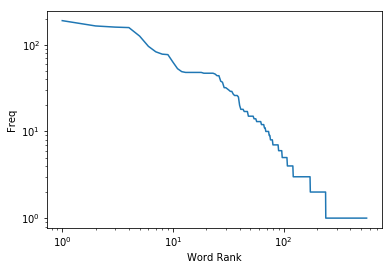

In [25]:
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

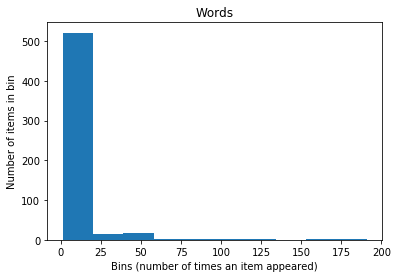

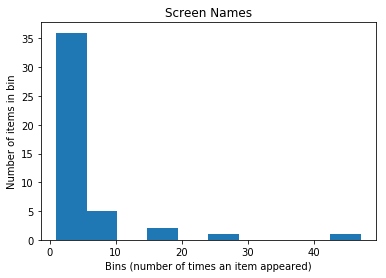

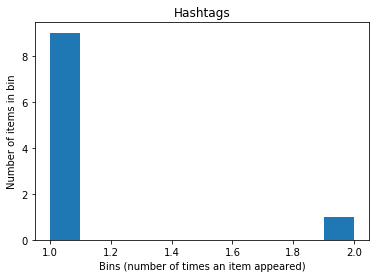

In [26]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    c = Counter(data)
    plt.hist(list(c.values()))
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    plt.figure()

[26, 1177, 1177, 15, 945, 26, 12, 1177, 99, 19, 945, 1177, 1, 1177, 99, 945, 3, 99, 88, 54, 945, 99, 26, 945, 99, 99, 99, 74, 99, 1177, 36, 99, 99, 99, 99, 99, 99, 945, 36, 1177, 19, 31, 1177, 1177, 99, 36, 36, 1177, 27, 945, 1177, 33, 99, 99, 99, 99, 1177, 36, 99, 4, 1, 3, 6, 99, 83, 6, 99, 4, 99, 1177, 1177, 36, 75, 99, 99, 99, 19, 99, 99, 99, 6, 1177, 196, 6, 945, 1177, 99, 99, 31, 99, 1177, 20, 19, 5, 6, 99, 1177, 1177, 36, 99, 7, 6, 12, 75, 99, 945, 36, 1177, 20, 99, 54, 54, 99, 99, 1177, 33, 77, 36, 2, 99, 1177, 99, 88, 945, 945, 1177, 31, 945, 69, 77, 99, 945, 36, 79, 1, 1177, 33, 1177, 51, 945, 99, 36, 78, 945, 945, 99, 7, 1177, 99, 99, 78, 3, 36, 99, 99, 36, 945, 196]


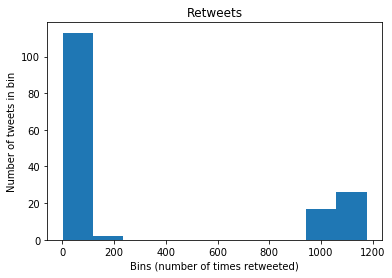

In [27]:
counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print (counts)

<b>Quellen: </b>
<br>
* Russell, M. A. (2013). Mining the Social Web: Data Mining Facebook, Twitter, LinkedIn, Google+, GitHub, and More. "   O'Reilly Media, Inc.".: http://chimera.labs.oreilly.com/books/1234000001583/ch01.html#social-websites-rage<br>
* Twitter Developer Dokumentation: https://dev.twitter.com/docs<br>
* Wikipedia: https://www.wikipedia.de/<br>
* Zafarani, R., Abbasi, M. A., & Liu, H. (2014). Social media mining: an introduction. Cambridge University Press. :http://dmml.asu.edu/smm/SMM.pdf<br>